<a href="https://colab.research.google.com/github/YasinMHussain/PythonPandas/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Predictions: ['yes' 'yes' 'no']


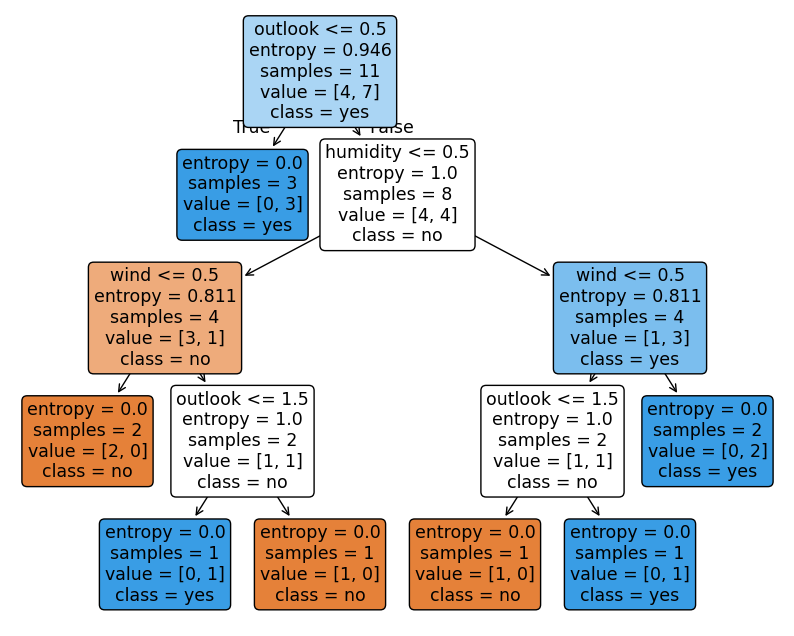

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the Play Tennis dataset as a DataFrame
data = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'wind': ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Encode categorical features to numeric
label_encoders = {}
for column in ['outlook', 'temperature', 'humidity', 'wind', 'play']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
X = df[['outlook', 'temperature', 'humidity', 'wind']]
y = df['play']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)



 # Make predictions
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show predictions on test data
print("Predictions:", label_encoders['play'].inverse_transform(y_pred))

# Visualize the decision tree
plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['play'].classes_, filled=True, rounded=True)
plt.show()